## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
#Importing the libraries
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Printing their versions
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.13.0
Keras Version 2.13.1


## Q2. Load the Wine Quality dataset and explore its dimensions. Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/rachitdani/Datasets/main/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [4]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#Checking for duplicates
df.duplicated().sum()

240

In [6]:
#Shape of the dataset
df.shape

(1599, 12)

In [7]:
#Dropiping the duplicates
df = df.drop_duplicates(keep="first")

In [8]:
df.shape

(1359, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 138.0+ KB


In [10]:
#Checking unique values to perform encoding
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [11]:
values = {"bad" : 0, "good" : 1}

In [12]:
#Mapping values so we convert the categorical column to numerical
df['quality'] = df['quality'].map(values)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [14]:
#Checking class balance
df["quality"].value_counts()

1    719
0    640
Name: quality, dtype: int64

## Q4. Separate the features and target variables from the dataset.

In [15]:
#Dependent and Independent Variables
X = df.drop(labels=["quality"],axis=1)
y = df["quality"]

In [16]:
X.shape , y.shape

((1359, 11), (1359,))

## Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [17]:
#Performing train test split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size= 0.20,random_state=42)
#Further Splitting train into train and validation data
X_train ,X_valid, y_train , y_valid = train_test_split(X_train,y_train,test_size= 0.20,random_state=42)

print(f"Training Data Shape : {X_train.shape , y_train.shape}")
print(f"Testing Data Shape : {X_test.shape , y_test.shape}")
print(f"Validation Data Shape : {X_valid.shape , y_valid.shape}")

Training Data Shape : ((869, 11), (869,))
Testing Data Shape : ((272, 11), (272,))
Validation Data Shape : ((218, 11), (218,))


In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


## Q6. Scale the dataset using an appropriate scaling technique.

In [19]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [20]:
#We have 11 input features which will passed as input to our neural network first layer
X_train.shape[1:]

(11,)

## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [21]:
#Creating our NEURAL Network Structure
from tensorflow.keras.layers import Input, Dense

LAYERS = [keras.layers.Input(shape=X_train.shape[1:],name="InputLayer"),
          keras.layers.Dense(500,activation='relu',name="HiddenLayer1"),
          keras.layers.Dense(250,activation='relu',name="HiddenLayer2"),
          keras.layers.Dense(100,activation='relu',name="HiddenLayer3"),
          keras.layers.Dense(1,activation='sigmoid',name="OutputLayer")
]

## Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [22]:
#Creating a Sequential Model using our defined our layers
model = keras.models.Sequential(LAYERS)

In [23]:
#Layers present in our NEURAL NETWORK
model.layers

## Q9. Print the summary of the model architecture.

In [24]:
#Summary of model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 500)               6000      
                                                                 
 HiddenLayer2 (Dense)        (None, 250)               125250    
                                                                 
 HiddenLayer3 (Dense)        (None, 100)               25100     
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 156451 (611.14 KB)
Trainable params: 156451 (611.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [25]:
#Defining our loss function,optimizer and metrics
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

## Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [26]:
#Fitting our defined metrics in the model
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [27]:
#Setting batch size and number of epochs
batch_size = 31
epoch = 15


#Fitting the model to the training data without using callbacks
history = model.fit(X_train, y_train,
                    epochs=epoch,
                    batch_size=batch_size,
                    verbose =2,
                    validation_data=(X_valid, y_valid)

                        )

Epoch 1/15
29/29 - 3s - loss: 0.5936 - accuracy: 0.7008 - val_loss: 0.5355 - val_accuracy: 0.7248 - 3s/epoch - 101ms/step
Epoch 2/15
29/29 - 0s - loss: 0.5263 - accuracy: 0.7399 - val_loss: 0.5308 - val_accuracy: 0.7248 - 428ms/epoch - 15ms/step
Epoch 3/15
29/29 - 0s - loss: 0.4962 - accuracy: 0.7629 - val_loss: 0.5205 - val_accuracy: 0.7339 - 391ms/epoch - 13ms/step
Epoch 4/15
29/29 - 0s - loss: 0.4872 - accuracy: 0.7595 - val_loss: 0.5543 - val_accuracy: 0.7431 - 431ms/epoch - 15ms/step
Epoch 5/15
29/29 - 0s - loss: 0.5067 - accuracy: 0.7537 - val_loss: 0.5531 - val_accuracy: 0.7202 - 437ms/epoch - 15ms/step
Epoch 6/15
29/29 - 0s - loss: 0.4761 - accuracy: 0.7733 - val_loss: 0.5318 - val_accuracy: 0.7156 - 372ms/epoch - 13ms/step
Epoch 7/15
29/29 - 0s - loss: 0.4423 - accuracy: 0.7802 - val_loss: 0.5539 - val_accuracy: 0.7248 - 310ms/epoch - 11ms/step
Epoch 8/15
29/29 - 0s - loss: 0.4406 - accuracy: 0.7860 - val_loss: 0.5511 - val_accuracy: 0.7248 - 323ms/epoch - 11ms/step
Epoch 9/15

In [28]:
history.params

{'verbose': 2, 'epochs': 15, 'steps': 29}

In [29]:
#Setting the params for the callbacks
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

#Storing the setted params of callbacks in a list
CALLBACKS = [early_stopping_cb,early_stopping_cb,checkpoint_cb]


#Fitting the model to the training data with using callbacks
history_callbacks = model.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=batch_size,
                        validation_data=(X_valid, y_valid),
                        verbose = 2,
                        callbacks= CALLBACKS )

Epoch 1/15
29/29 - 1s - loss: 0.3585 - accuracy: 0.8377 - val_loss: 0.5851 - val_accuracy: 0.7706 - 574ms/epoch - 20ms/step
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 - 0s - loss: 0.4124 - accuracy: 0.7998 - val_loss: 0.5457 - val_accuracy: 0.7706 - 328ms/epoch - 11ms/step
Epoch 3/15
29/29 - 0s - loss: 0.3675 - accuracy: 0.8343 - val_loss: 0.5623 - val_accuracy: 0.7523 - 312ms/epoch - 11ms/step
Epoch 4/15
29/29 - 0s - loss: 0.3585 - accuracy: 0.8343 - val_loss: 0.5960 - val_accuracy: 0.7385 - 370ms/epoch - 13ms/step


In [30]:
history_callbacks.params

{'verbose': 2, 'epochs': 15, 'steps': 29}

## Q13. Obtain the model's parameters (weights and biases).

In [31]:
#Acessing each layer
layer1 = model.layers[0]
layer2 = model.layers[1]
layer3 = model.layers[2]
layer4 = model.layers[3]


layer1.name , layer2.name , layer3.name , layer4.name

('HiddenLayer1', 'HiddenLayer2', 'HiddenLayer3', 'OutputLayer')

In [32]:
#Getting weights and biases of the first hidden layer and output layer
weights1 , biases1 = layer1.get_weights()
weights2 , biases2 = layer4.get_weights()

In [33]:
#Printing first hidden layer weights shape and first 5 weights
weights1.shape , weights1[:5]

((11, 500),
 array([[-9.52915871e-05, -5.05203642e-02, -3.67119089e-02, ...,
         -3.36203389e-02, -1.36744985e-02,  4.78067733e-02],
        [ 4.60149646e-02,  8.74495432e-02, -5.69711486e-03, ...,
         -5.43716736e-03, -3.85029539e-02,  5.65348417e-02],
        [-4.94852010e-03,  1.07432045e-01,  9.06840153e-03, ...,
         -7.31531456e-02,  1.23798013e-01, -9.46737453e-02],
        [-1.98819991e-02,  8.55662599e-02, -2.74852701e-02, ...,
          5.66248707e-02,  3.94918807e-02,  7.59690478e-02],
        [-1.29790679e-02,  1.92758068e-02, -3.44177373e-02, ...,
         -6.44652322e-02, -9.16207656e-02,  5.51037043e-02]], dtype=float32))

In [34]:
#Printing first hidden layer baises shape and first 5 baises
biases1.shape , biases1[:5]

((500,),
 array([ 0.00670309,  0.00645681, -0.00531381, -0.00361068,  0.00143379],
       dtype=float32))

In [35]:
#Printing output layer weights shape and first 5 weights
weights2.shape , weights2[:5]

((100, 1),
 array([[ 0.17494594],
        [ 0.12512918],
        [-0.03908207],
        [ 0.01310536],
        [ 0.26398456]], dtype=float32))

In [36]:
#Printing output layer biases shape and first 5 weights
biases2.shape , biases2[:5]

((1,), array([0.02641377], dtype=float32))

## Q14. Store the model's training history as a Pandas DataFrame.

In [37]:
#Storing model history before using callbacks in a dataframe
model_history_df = pd.DataFrame(history.history)
model_history_df

,loss,accuracy,val_loss,val_accuracy
0,0.593576,0.700806,0.535529,0.724771
1,0.526277,0.739931,0.530841,0.724771
2,0.496203,0.762946,0.520484,0.733945
3,0.487201,0.759494,0.554296,0.743119
4,0.506739,0.753740,0.553070,0.720183
5,0.476084,0.773303,0.531787,0.715596
6,0.442301,0.780207,0.553932,0.724771
7,0.440579,0.785961,0.551099,0.724771
8,0.438019,0.782509,0.526397,0.738532
9,0.426252,0.798619,0.527326,0.756881


In [38]:
#Storing model history after using callbacks in a dataframe

model_history_df_callbacks = pd.DataFrame(history_callbacks.history)
model_history_df_callbacks

,loss,accuracy,val_loss,val_accuracy
0,0.358457,0.837745,0.585123,0.770642
1,0.412361,0.799770,0.545681,0.770642
2,0.367499,0.834292,0.562250,0.752294
3,0.358476,0.834292,0.595950,0.738532


## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

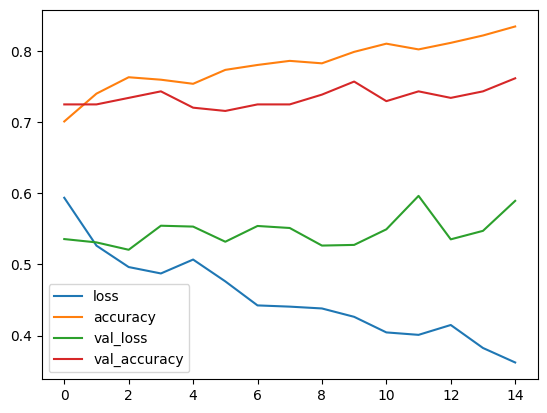

In [39]:
#Plot the model history before using callbacks
model_history_df.plot()

<Axes: >

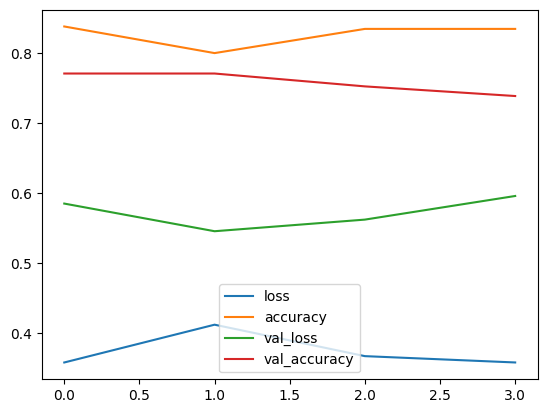

In [40]:
#Plot the model history after using callbacks
model_history_df_callbacks.plot()

## Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [41]:
#Evaluating the model performance after using callback functions
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 9ms/step - loss: 0.5354 - accuracy: 0.7500


[0.5353670120239258, 0.75]

In [42]:
#To predict these values passing a sample of 10 values from the x_test
x_new = X_test[:10]

#The actual classes of these 10 samples passed
actual = y_test[:10]
actual

55      0
1291    1
1544    1
593     0
1261    0
491     1
1004    0
889     0
1154    1
824     0
Name: quality, dtype: int64

In [43]:
#Probalities of the sample values passed
y_prob = model.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 1s 636ms/step


array([[0.108],
       [0.924],
       [0.999],
       [0.118],
       [0.37 ],
       [0.999],
       [0.514],
       [0.011],
       [0.899],
       [0.417]], dtype=float32)

In [44]:
# Predict with threshold set as 0.5,if values have a probality greater than 05 they belong to class 1 else they belong to class 0
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [45]:
list(actual)

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

In [46]:
ypred

[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

In [47]:
#Evaluating the Model Performance
from sklearn.metrics import classification_report,confusion_matrix

y_prob = model.predict(X_test)

# Predict with threshold set as 0.5,if values have a probality greater than 05 they belong to class 1 else they belong to class 0
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

print(confusion_matrix(y_test,ypred))
print("=================================================")
print(classification_report(y_test,ypred))


9/9 [==============================] - 0s 5ms/step
[[100  35]
 [ 33 104]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       135
           1       0.75      0.76      0.75       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272

